<a href="https://colab.research.google.com/github/BillDevData/Challenge-2-Data-Science/blob/main/notebook_del_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Cargando el DataSet

In [86]:
import pandas as pd

In [87]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [88]:
url = 'https://raw.githubusercontent.com/BillDevData/Challenge-2-Data-Science/refs/heads/main/TelecomX_Data.json'

In [89]:
datos = pd.read_json(url)

In [90]:
datos.sample(10)

,customerID,Churn,customer,phone,internet,account
4101,5622-UEJFI,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7000,9638-JIQYA,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4273,5876-QMYLD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
5432,7432-XWSQO,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
4864,6651-RLGGM,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
4202,5774-QPLTF,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
1362,1970-KKFWL,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
5048,6899-PPEEA,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6748,9300-AGZNL,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5596,7641-EUYET,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [91]:
dict_cols = ['customer', 'phone', 'internet', 'account']

In [92]:
for col in dict_cols:
    datos = pd.concat([datos.drop(columns=[col]), pd.json_normalize(datos[col])], axis=1)

datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [93]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### 1. Analizando inconsistencias en la información de las columnas

In [94]:
datos['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [95]:
#Las filas sin información del Churn son eliminadas al ser un porcentaje pequeño del total de filas.
datos = datos[datos['Churn'] != '']

In [96]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [97]:
# Eliminar filas donde Charges.Total está vacío
datos = datos[datos['Charges.Total'].astype(str).str.strip() != ''].copy()

In [98]:
datos.shape

(7032, 21)

In [99]:
datos['Churn'].unique()
# Sólo Yes y No

array(['No', 'Yes'], dtype=object)

In [100]:
# Comprobando la columna gender
datos['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [101]:
# Comprobando la columna SeniorCitizen
datos['SeniorCitizen'].unique()

array([0, 1])

In [102]:
# Comprobando la columna Dependents
datos['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [103]:
# Comprobando la columna tenure
datos['tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42])

In [104]:
# Comprobando la columna PhoneService
datos['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [105]:
# Comprobando la columna MultipleLines
datos['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [106]:
#Capturando inconsistentes
df_no_phone = datos[datos['PhoneService'] == 'No'].copy()
df_no_phone['MultipleLines'].unique()

array(['No phone service'], dtype=object)

In [107]:
df_with_phone = datos[datos['PhoneService'] == 'Yes'].copy()
df_with_phone['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [108]:
# Comprobando la columna InternetService
datos['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [109]:
#Capturando inconsistentes
df_no_internet = datos[datos['InternetService'] == 'No'].copy()
df_no_internet['OnlineSecurity'].unique()

array(['No internet service'], dtype=object)

In [110]:
df_no_internet['OnlineBackup'].unique()

array(['No internet service'], dtype=object)

In [111]:
df_no_internet['TechSupport'].unique()

array(['No internet service'], dtype=object)

In [112]:
df_no_internet['DeviceProtection'].unique()

array(['No internet service'], dtype=object)

In [113]:
df_no_internet['StreamingTV'].unique()

array(['No internet service'], dtype=object)

In [114]:
df_no_internet['StreamingMovies'].unique()

array(['No internet service'], dtype=object)

In [115]:
df_with_internet = datos[datos['InternetService'].isin(['DSL', 'Fiber optic'])].copy()
df_with_internet['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [116]:
df_with_internet['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [117]:
df_with_internet['TechSupport'].unique()

array(['Yes', 'No'], dtype=object)

In [118]:
df_with_internet['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [119]:
df_with_internet['StreamingTV'].unique()

array(['Yes', 'No'], dtype=object)

In [120]:
df_with_internet['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [121]:
# Comprobando la columna Contract
datos['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [122]:
# Comprobando la columna PaperlessBilling
datos['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [123]:
# Comprobando la columna PaymentMethod
datos['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [124]:
# Revisar valores nulos o vacíos en Charges.Monthly
print(datos['Charges.Monthly'].isna().sum())

0


In [125]:
# convertir Charges.Total a númerico
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')

In [126]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [127]:
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6720,9253-QXKBE,Yes,Male,1,Yes,No,29,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,2653.65
1103,1561-BWHIN,No,Male,0,Yes,Yes,19,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,344.50
4833,6618-RYATB,Yes,Female,0,No,No,1,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,79.55,79.55
2216,3094-JOJAI,No,Male,0,No,No,18,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Mailed check,74.15,1387.00
2707,3750-YHRYO,No,Male,0,Yes,Yes,7,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,150.00
474,0674-DGMAQ,No,Male,1,Yes,No,32,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,93.50,2970.80
464,0661-KQHNK,No,Female,0,Yes,Yes,6,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.00,105.50
4916,6723-CEGQI,No,Female,0,No,Yes,65,No,No phone service,DSL,...,Yes,No,Yes,Yes,No,Two year,No,Mailed check,45.25,2933.95
3021,4194-FJARJ,No,Female,0,Yes,Yes,54,Yes,Yes,DSL,...,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),60.00,3273.95
2249,3143-ILDAL,Yes,Male,0,No,No,56,Yes,Yes,Fiber optic,...,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.60


In [128]:
datos['SeniorCitizen'] = datos['SeniorCitizen'].astype(bool)

In [129]:
datos['Cuentas_Diarias'] = (datos['Charges.Monthly'] / 30).round(2)

In [130]:
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
3223,4501-UYKBC,No,Female,True,No,No,46,Yes,Yes,DSL,...,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),69.10,3255.35,2.30
404,0578-SKVMF,Yes,Female,False,Yes,Yes,22,Yes,No,Fiber optic,...,No,No,No,Yes,Month-to-month,No,Electronic check,83.30,1845.90,2.78
6824,9408-SSNVZ,Yes,Female,False,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,268.35,2.34
3546,4884-ZTHVF,No,Female,True,No,No,8,Yes,No,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,87.10,713.60,2.90
1195,1704-NRWYE,Yes,Female,True,No,No,9,Yes,No,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.85,751.65,2.70
5466,7493-GVFIO,No,Male,False,No,No,57,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1252.85,0.68
2708,3751-KTZEL,Yes,Female,False,No,No,1,No,No phone service,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,35.05,35.05,1.17
4474,6131-JLWZM,No,Female,False,No,No,13,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,275.40,0.68
4516,6188-UXBBR,No,Female,False,Yes,No,38,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.25,814.75,0.68
3806,5208-FVQKB,No,Male,False,Yes,No,70,Yes,No,DSL,...,No,Yes,No,Yes,Two year,No,Mailed check,67.95,4664.15,2.26


In [131]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   bool   
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

2. Transformando el tipo de data a booleano, string o category.

In [132]:
# Booleanas
bool_cols = ["Churn", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for col in bool_cols:
    datos[col] = datos[col].map({"Yes": True, "No": False})

# Categóricas
cat_cols = [
    "gender", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaymentMethod"
]
for col in cat_cols:
    datos[col] = datos[col].astype("category")

In [133]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Churn             7032 non-null   bool    
 2   gender            7032 non-null   category
 3   SeniorCitizen     7032 non-null   bool    
 4   Partner           7032 non-null   bool    
 5   Dependents        7032 non-null   bool    
 6   tenure            7032 non-null   int64   
 7   PhoneService      7032 non-null   bool    
 8   MultipleLines     7032 non-null   category
 9   InternetService   7032 non-null   category
 10  OnlineSecurity    7032 non-null   category
 11  OnlineBackup      7032 non-null   category
 12  DeviceProtection  7032 non-null   category
 13  TechSupport       7032 non-null   category
 14  StreamingTV       7032 non-null   category
 15  StreamingMovies   7032 non-null   category
 16  Contract          7032 non-nu

In [134]:
datos.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.80
5,0013-MHZWF,False,Female,False,False,True,9,True,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,True,Credit card (automatic),69.40,571.45,2.31
6,0013-SMEOE,False,Female,True,True,False,71,True,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,True,Bank transfer (automatic),109.70,7904.25,3.66
7,0014-BMAQU,False,Male,False,True,False,63,True,Yes,Fiber optic,...,No,Yes,No,No,Two year,True,Credit card (automatic),84.65,5377.80,2.82
8,0015-UOCOJ,False,Female,True,False,False,7,True,No,DSL,...,No,No,No,No,Month-to-month,True,Electronic check,48.20,340.35,1.61
9,0016-QLJIS,False,Female,False,True,True,65,True,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,True,Mailed check,90.45,5957.90,3.02


In [135]:
datos.shape

(7032, 22)

# 3. Analisis Exploratorio

In [136]:
# Datos estádisticos de Cuentas diarias
datos.describe()

,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891
std,24.545260,30.085974,2266.771362,1.002955
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.587500,401.450000,1.187500
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.862500,3794.737500,2.992500
max,72.000000,118.750000,8684.800000,3.960000


In [137]:
datos["Churn"].value_counts()

,count
Churn,
False,5163
True,1869


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

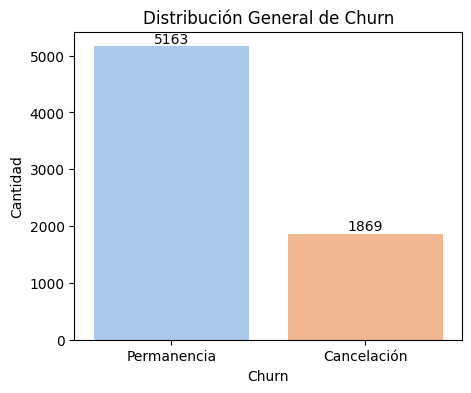

In [139]:
plt.figure(figsize=(5,4))

ax = sns.countplot(
    data=datos,
    x=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    hue=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    palette="pastel",
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Distribución General de Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
plt.show()

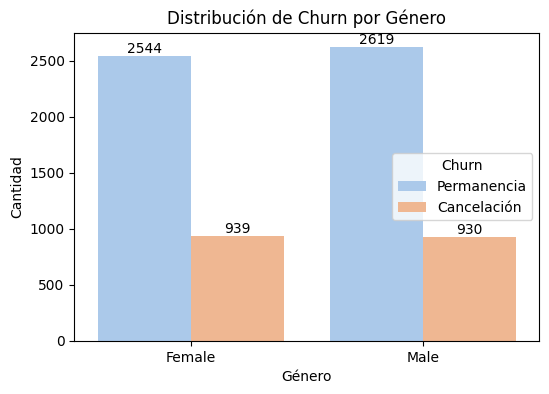

In [140]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    data=datos,
    x='gender',
    hue=datos['Churn'].map({False: "Permanencia", True: "Cancelación"}),
    palette="pastel"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Distribución de Churn por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title="Churn")
plt.show()

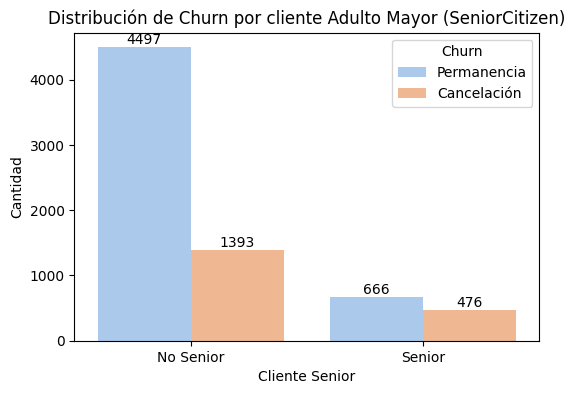

In [141]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    data=datos,
    x=datos['SeniorCitizen'].map({False:"No Senior", True:"Senior"}),
    hue=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    palette="pastel"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Distribución de Churn por cliente Adulto Mayor (SeniorCitizen)')
plt.xlabel('Cliente Senior')
plt.ylabel('Cantidad')
plt.legend(title="Churn")
plt.show()


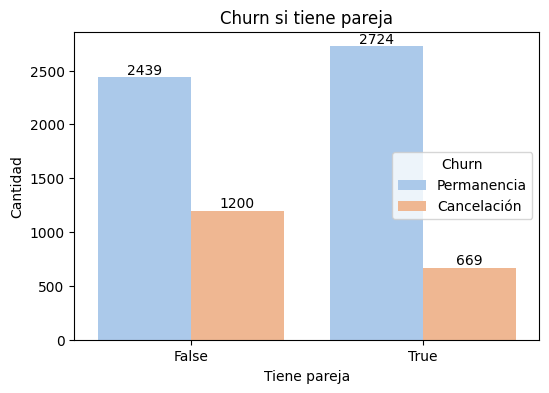

In [142]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    data=datos,
    x="Partner",
    hue=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    palette="pastel"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Churn si tiene pareja')
plt.xlabel('Tiene pareja')
plt.ylabel('Cantidad')
plt.legend(title="Churn")
plt.show()


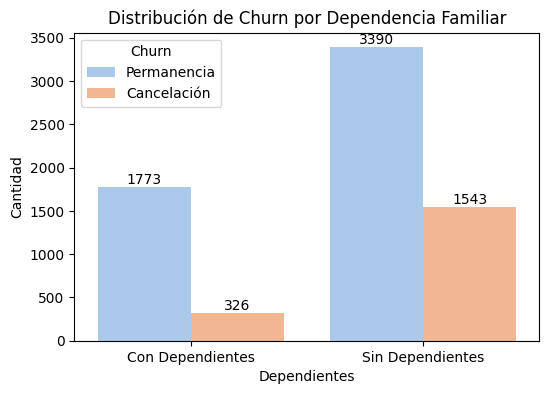

In [143]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    data=datos,
    x=datos['Dependents'].map({False:"Sin Dependientes", True:"Con Dependientes"}),
    hue=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    palette="pastel"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Distribución de Churn por Dependencia Familiar')
plt.xlabel('Dependientes')
plt.ylabel('Cantidad')
plt.legend(title="Churn")
plt.show()


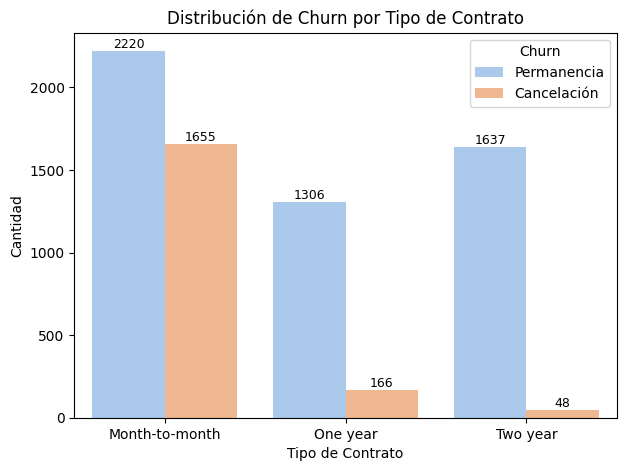

In [144]:
plt.figure(figsize=(7,5))
ax = sns.countplot(
    data=datos,
    x='Contract',
    hue=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    palette="pastel"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.legend(title="Churn")
plt.show()

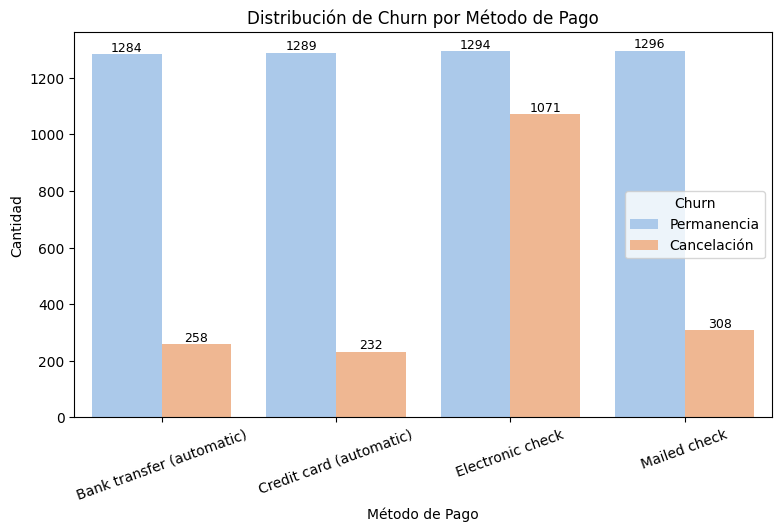

In [145]:
plt.figure(figsize=(9,5))
ax = sns.countplot(
    data=datos,
    x='PaymentMethod',
    hue=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    palette="pastel"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.title('Distribución de Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad')
plt.legend(title="Churn")
plt.xticks(rotation=20)
plt.show()

/tmp/ipython-input-1696194105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


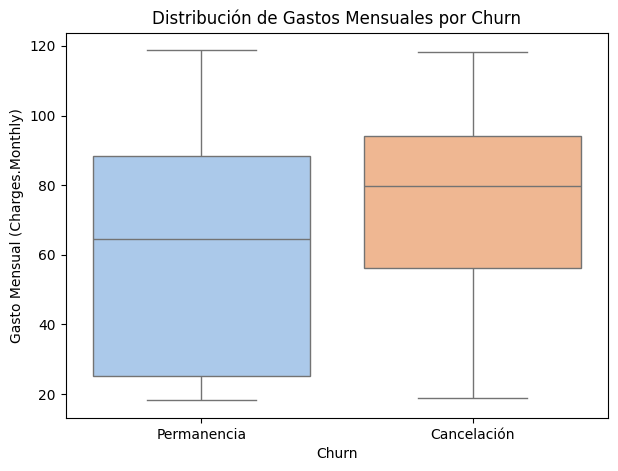

In [152]:
plt.figure(figsize=(7,5))
ax = sns.boxplot(
    data=datos,
    x=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    y='Charges.Monthly',
    palette="pastel"
)

plt.title('Distribución de Gastos Mensuales por Churn')
plt.xlabel('Churn')
plt.ylabel('Gasto Mensual (Charges.Monthly)')
plt.show()

/tmp/ipython-input-424144113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


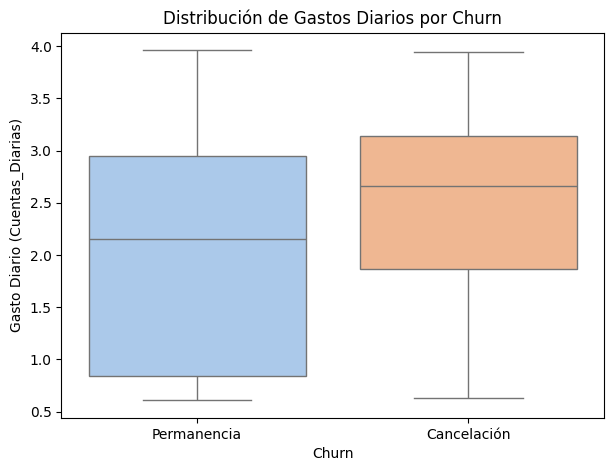

In [151]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=datos,
    x=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    y='Cuentas_Diarias',
    palette="pastel"
)

plt.title('Distribución de Gastos Diarios por Churn')
plt.xlabel('Churn')
plt.ylabel('Gasto Diario (Cuentas_Diarias)')
plt.show()

/tmp/ipython-input-3071565488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


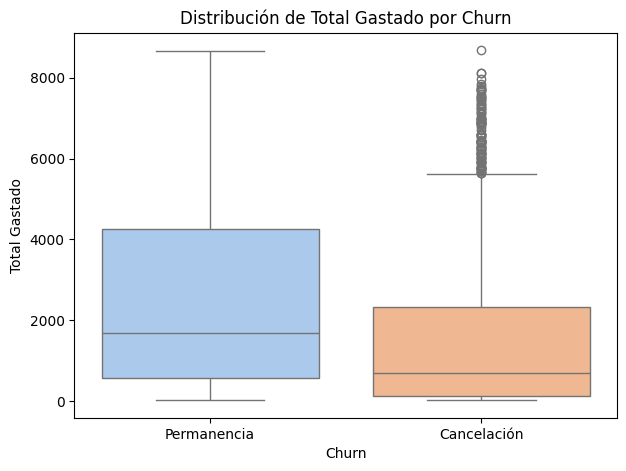

In [154]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=datos,
    x=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    y='Charges.Total',
    palette="pastel"
)

plt.title('Distribución de Total Gastado por Churn')
plt.xlabel('Churn')
plt.ylabel('Total Gastado')
plt.show()

/tmp/ipython-input-3874541181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


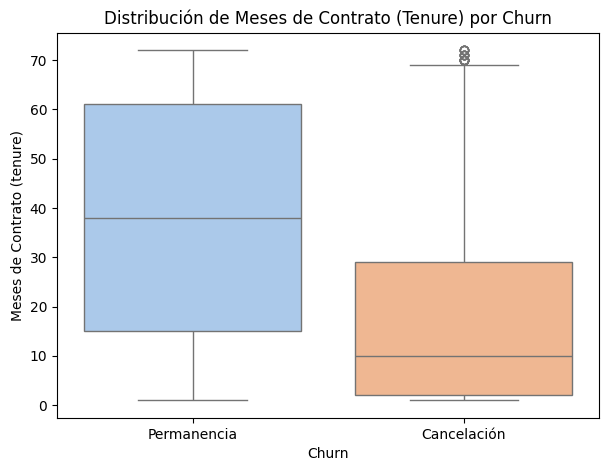

In [155]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=datos,
    x=datos['Churn'].map({False:"Permanencia", True:"Cancelación"}),
    y='tenure',
    palette="pastel"
)

plt.title('Distribución de Meses de Contrato (Tenure) por Churn')
plt.xlabel('Churn')
plt.ylabel('Meses de Contrato (tenure)')
plt.show()

# 4. Informe final

- Introducción

El presente análisis tiene como objetivo comprender el fenómeno de evasión de clientes (Churn) dentro de la empresa Telecom. El churn hace referencia a la cancelación del servicio por parte de los clientes, lo cual supone una pérdida sensible para la empresa.
El propósito principal del análisis es identificar patrones asociados a las características de los clientes que cancelan el servicio, para apoyar la toma de decisiones estratégicas que reduzcan esta evasión.

- Limpieza y Tratamiento de Datos

Carga de Datos: Se cargó el dataset utilizando la biblioteca Pandas de Pyhton. Este dataset incluye información importante de clientes que incluye personal, contractual y de facturación.

Depuración de datos: Se eliminaron filas con valores vacios tanto en la columna Churn como en la columna de Total Gastado. Represetaban sólo poco más del 3% de la información total.

Revisión de Tipos de Datos: Se ajustaron columnas mal tipadas (por ejemplo, variables numéricas que aparecían como objetos).

Se transformaron columnas categóricas y booleanas (Partner, Dependents, etc.) a formatos que fueran más acordes a la información que ofrecían.

Creación de Variables Nuevas: Se calcularon gastos diarios a partir de los cargos mensuales para enriquecer el análisis.

- Análisis Exploratorio de Datos

Se hizo un análisis exploratorio gráfico con apoyo de las bibliotecas Matplotlib y Seaborn.
Primeros se observó la distribución general de Churn. Luego se hizo la comparación con variables demográficas, contractuales y financieras.

- Conclusiones e Insights

Un cliente sin pareja ni carga familiar será ligeramente más propenso a abandonar el servicio. Puede abandonar el servicio sin que afecte a gente cercana.

El tipo de contrato mensual es, con diferencia, el que más lleva a los clientes a abandonar el servicio. Debido a lo fácil que es abandonar un servicio a plazo mensual, por ser un periodo corto de tiempo

El método de pago más asociado con el abandono es el de cheque eletrónico. Es un método de pago asociado a clientes que dominan recursos digitales, y por tanto son más propensos a la exploración de posibilidades y consecuentemente son relativamente volátiles.

Se observa también que la mayor taza de abandonos tomando en cuenta el gasto mensual es quienes precisamente pagan montos más altos. El abandono deriva de la necesidad de aliviar gastos.

Finalmente se observa que el abandono también viene de parte de gente con poco tiempo como clientes, es decir, poco fidelizados.


- Recomendaciones

Buscar retener a los cliente con contratos mensuales, ofreciendo ofertas o programas de beneficios especiales. También buscar ofrecerles contratos con periodos más largos.

Para clientes con pagos mensuales altos, se debe de ofrecer campañas para aliviar en cierto porcentaje este monto, incentivar la fidelización. Se pueden diseñar programas de valor agregado para justificar la inversión.

Incrementar la fidelización de clientes nuevos con la promoción de beneficios especiales con el fin de de retenerlos a largo plazo.

Para clientes sin carga familiar, diseñar ofertas y programas especiales enfocadas especificamente en el consumo individual.